In [ ]:
데이터 전처리

정의
    - 데이터를 분석에 사용할때 성능이 좋아지도록 데이터를 수정하거나 변형하는 작업
    - data preprocessing
    
    원시데이터  ==> 전처리 ===>x==> 데이터분석(머신러닝모델) ===>y===(설명,군집화,예측(회귀/분류),추천)

In [ ]:
데이터 전처리 종류(전처리의 필수)
- 데이터 클리닝 - (결측치, 틀린값처리)
- 스케일링 - 여러변수의 값의 범위를 동등한 조건으로 맞추는 것 : 표준스케일링, min-max 스케일링
- 이상치 처리 -이상치 탐지 및 제거/대체 
- 데이터변환 - 로그변환,카테고리인코딩

### 데이터 클리닝

In [ ]:
결측치 처리
- 값이 비어있는것을 의(파이썬에서는 빈값이 nan으로 표시 : not a number)
- 결측치를 처리하는 세가지 방법
    - 결측치가 포함된 샘플(행)을 버린다
    - 결측치를 적절한 값으로 대체한다(평균이나 0으로 대체하는것이 일반적)
    - 결측치 처리를 다음 분석 단계로 넘긴다 즉, 결측치를 그대로 둔다

In [ ]:
틀린값 처리
- 잘못된 값
- 틀린값 처리하는 세가지 방법
    - 포함된 샘플(행)을 버린다
    - 적절한 값으로 대체한다(평균이나 0으로 대체하는것이 일반적)
    - 처리를 다음 분석 단계로 넘긴다 즉, 틀린값을 그대로 둔다

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns # matplotlib을 이용해서 시각화 함수를 제공

In [ ]:
실습데이터 생성
    - 키와 몸무게 데이터 생성
    - 평균 170,65, 표준편차 4cm, 5kg

In [2]:
n_sample = 1000
height = 4*np.random.randn(n_sample).round(2) + 170
weight = 5*np.random.randn(n_sample).round(2) + 65

## df 생성
df_raw = pd.DataFrame({'키':height,'몸무게':weight})
df_raw.head()

,키,몸무게
0,169.88,62.35
1,174.20,66.00
2,169.72,61.90
3,165.32,74.55
4,170.44,63.80


In [3]:
#  원본 백업 (copy()이용)
df = df_raw.copy()

In [7]:
df['키'].mean()
df['몸무게'].mean()
df['키'].std()
df['몸무게'].std()

4.772570314296574

<AxesSubplot:ylabel='Count'>

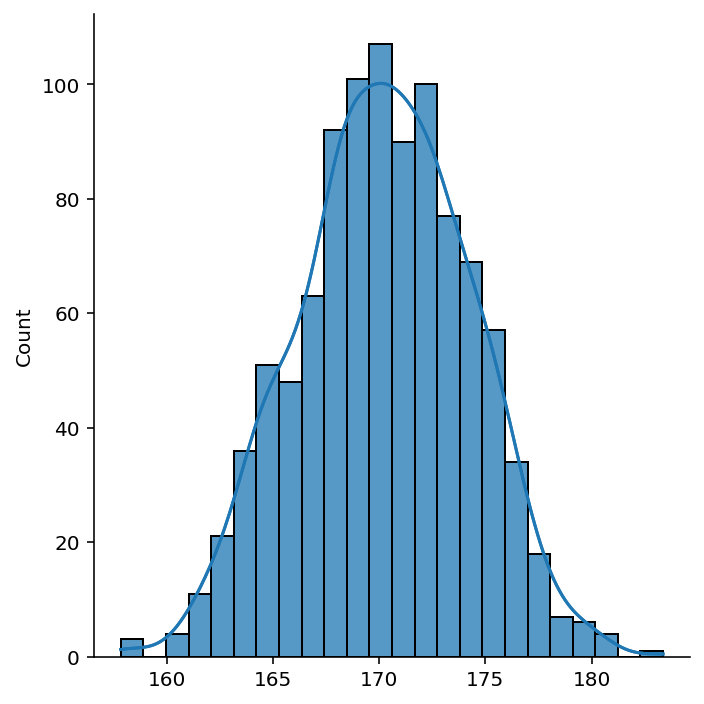

In [10]:
## 샘플의 확률분포 근사 그래프 보기
sns.displot(df.키.values,kde=True)
sns.histplot(df.키.values,kde=True)

### 결측치 처리 실습
    - 결측치 확인 np.isnull() 사용
    - 결측치 치환 np.fillna() 사용

In [11]:
df[:5]

,키,몸무게
0,169.88,62.35
1,174.20,66.00
2,169.72,61.90
3,165.32,74.55
4,170.44,63.80


In [12]:
# 임의의 값을 na  값으로 변경
df['몸무게'][3] = np.nan
df.head()

,키,몸무게
0,169.88,62.35
1,174.20,66.00
2,169.72,61.90
3,165.32,NaN
4,170.44,63.80


In [14]:
#  결측치 갯수 세기
df.isnull().sum()

키      0
몸무게    1
dtype: int64

In [15]:
# 결측치가 있는 sample 삭제 : dropna() 함수 사용
# 키는 정상데이터가 있고 몸무게만 결측 - 키변수의 중요도에 따라 결정
# 결측치가 있는 데이터가 너무 많아서 삭제하면 데이터의 양이 현격하게 줄어들때 - 삭제할 것인지 결정
df2 = df.dropna() #na가 있는 행은 모두 지운다
print(df2.shape)
df2.head()

(999, 2)


,키,몸무게
0,169.88,62.35
1,174.20,66.00
2,169.72,61.90
4,170.44,63.80
5,165.52,59.80


In [16]:
##  결측치를 다른 값으로 대체 하기
##  0 으로 대체하는 경우
## 몸무게나 키가 0일수가 없기때문에 몸무게나 키는 0으로 대체하면 안됨
df.fillna(0).head()


,키,몸무게
0,169.88,62.35
1,174.20,66.00
2,169.72,61.90
3,165.32,0.00
4,170.44,63.80


In [18]:
## 결측치를 다른 값으로 대체 하기
## 평균으로 대체하기
## 키와 몸무게 데이터는 평균으로 대체하는 경우가 많음
df3 = df.fillna(df['몸무게'].mean())
df3.shape

(1000, 2)

In [19]:
df3.head()

,키,몸무게
0,169.88,62.350000
1,174.20,66.000000
2,169.72,61.900000
3,165.32,64.802603
4,170.44,63.800000


In [20]:
## 결측치를 다른 값으로 대체 하기
## 결측치 행의 주변값으로 대체하기
## 날씨와 관련된 데이터 등 시계열 데이터인 경우 많이 사용
## fillna(method='ffill/bfill') : forwardfill, backwardfill
df.fillna(method='ffill').head()

,키,몸무게
0,169.88,62.35
1,174.20,66.00
2,169.72,61.90
3,165.32,61.90
4,170.44,63.80


### 스케일링
- 여러 변수 값의 범위가 서로 다른경우 데이터 분석에 동일한 비중으로 반영되도록 하기위해 동일한 범위로 변환하는 과정 (ex : 과목 성적 30점만점 환상)

- 표준스케일링을 가장 많이 사용(평균을 0, 표준편차 1이 되도록 변환)
    표준스케일링했다고 분포가 변하지는 않는다. 데이분포 형태는 그대로 유지되고 평균이 0, 표준편차 1
- 값의 최소치와 최대치가 정해진 경우 min-max 스케일링도 자주 사용(최소값을 0 최대값을 1로)
    - 전압이 0-5 만 나온다면 min-max 스케일링 사용

표준스케일링 : 관측치-평균/표준편차

In [21]:
## 키와 몸무게 데이터를 각각 표준 스케일링 한 후 컬럼에추가
## fit_transform() :  표준 스케일링 구성
df = df_raw.copy() # 결측치 없는 데이터 사용

In [23]:
from sklearn.preprocessing import StandardScaler # 표준 스케일링 함수
scale = StandardScaler() # 생성자 호출해서 객체 생성
df[['키_sc','몸무게_sc']]= scale.fit_transform(df[['키','몸무게']])

In [24]:
df.head()

,키,몸무게,키_sc,몸무게_sc
0,169.88,62.35,-0.083614,-0.516196
1,174.20,66.00,1.004643,0.248974
2,169.72,61.90,-0.123920,-0.610532
3,165.32,74.55,-1.232331,2.041358
4,170.44,63.80,0.057456,-0.212225


In [25]:
# scale의 평균, 표준편차
scale.mean_ , scale.scale_

(array([170.21192,  64.81235]), array([3.96964869, 4.77018343]))

In [27]:
df['몸무게_sc'].mean() #0.00000000000000010027
df['키_sc'].mean() -0.00000000000000050373

-5.03730390732926e-15

In [ ]:
## 스케일링 이전의 원래값으로 환원
- inverse_transform() 사용

In [29]:
## 스케일링 이전 원래값 보기
scale.inverse_transform(df[['키_sc','몸무게_sc']])[:5]

array([[169.88,  62.35],
       [174.2 ,  66.  ],
       [169.72,  61.9 ],
       [165.32,  74.55],
       [170.44,  63.8 ]])

<AxesSubplot:ylabel='Density'>

C:\Users\i\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\i\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\i\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\i\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\i\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\i\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47800 missing from current font.
  font.set_te

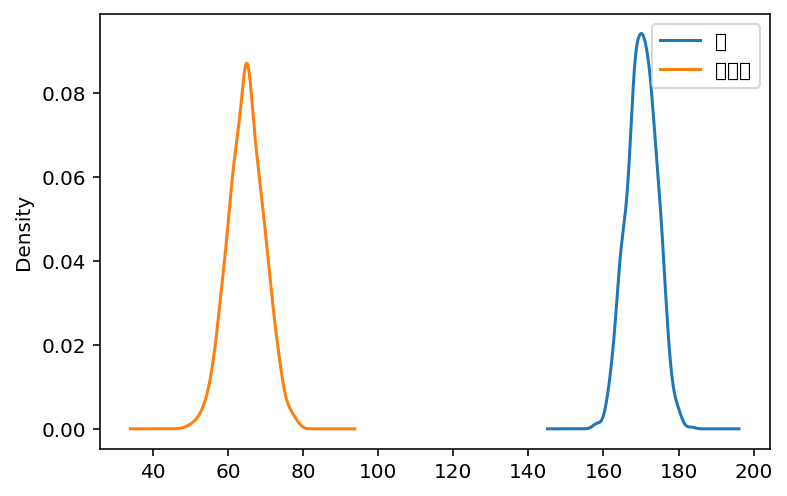

In [30]:
## 데이터 분포 시각화
df[['키','몸무게']].plot.kde() #히스토그램에 가장 근접한 확률분포함수를 이용한 그래프그림
## 두 데이터 범위가 다르게 나타남

<AxesSubplot:ylabel='Density'>

C:\Users\i\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\i\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\i\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\i\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\i\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\i\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47800 missing from current font.
  font.set_te

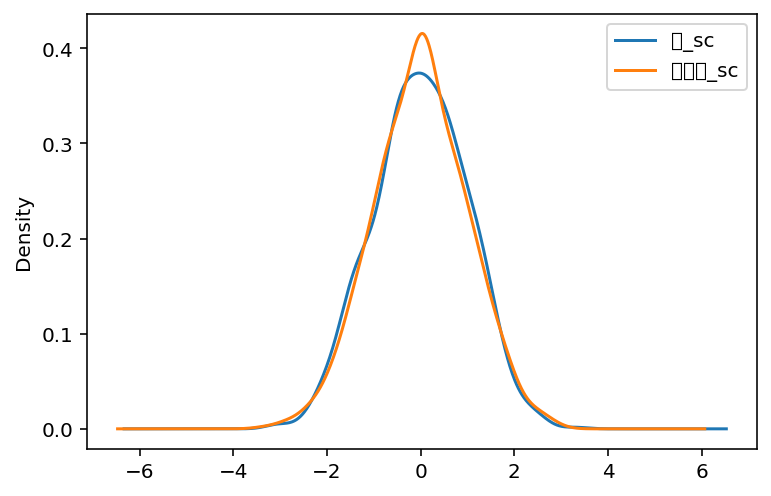

In [31]:
## 데이터 분포 시각화
df[['키_sc','몸무게_sc']].plot.kde() #히스토그램에 가장 근접한 확률분포함수를 이용한 그래프그림

In [32]:
## min_max 스케일링 (데이터의 최소값이 0 최대값이 1이되도록 조정)
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
df[['키_nx','몸무게_nx']]=minmax.fit_transform(df[['키','몸무게']])
df.head()

,키,몸무게,키_sc,몸무게_sc,키_nx,몸무게_nx
0,169.88,62.35,-0.083614,-0.516196,0.471787,0.449833
1,174.20,66.00,1.004643,0.248974,0.641066,0.571906
2,169.72,61.90,-0.123920,-0.610532,0.465517,0.434783
3,165.32,74.55,-1.232331,2.041358,0.293103,0.857860
4,170.44,63.80,0.057456,-0.212225,0.493730,0.498328


<AxesSubplot:ylabel='Density'>

C:\Users\i\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\i\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\i\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\i\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\i\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\i\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47800 missing from current font.
  font.set_te

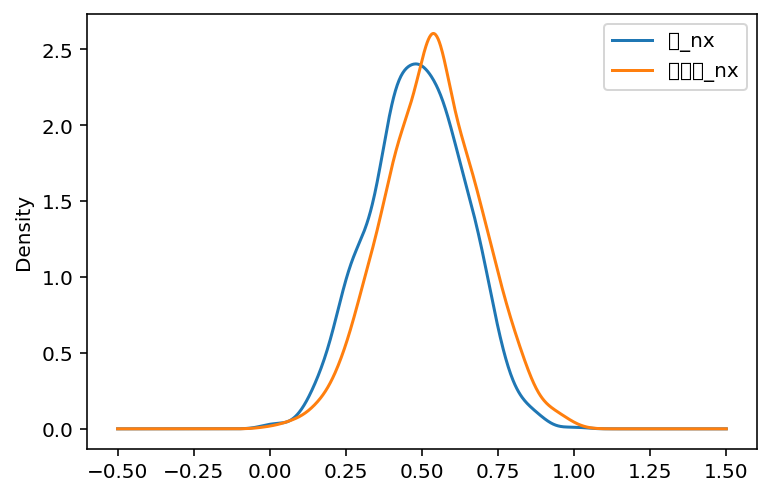

In [33]:
## min_max 스케일링 분포 확인
df[['키_nx','몸무게_nx']].plot.kde()

In [35]:
df['키_nx'].max()

1.0

In [37]:
## 이상치가 포함될 경우
## 이상치가 포함된 키 데이터 생성 키_1
키_1 =height.copy()
키_1[0] = 200
df['키_1']=키_1

In [38]:
df.head()

,키,몸무게,키_sc,몸무게_sc,키_nx,몸무게_nx,키_1
0,169.88,62.35,-0.083614,-0.516196,0.471787,0.449833,200.00
1,174.20,66.00,1.004643,0.248974,0.641066,0.571906,174.20
2,169.72,61.90,-0.123920,-0.610532,0.465517,0.434783,169.72
3,165.32,74.55,-1.232331,2.041358,0.293103,0.857860,165.32
4,170.44,63.80,0.057456,-0.212225,0.493730,0.498328,170.44


In [39]:
## 이상치가 포함된 데이터(컬럼)에 표준 스케일링을 적용
df['키_1_sc']=scale.fit_transform(df[['키_1']])
df.head()

,키,몸무게,키_sc,몸무게_sc,키_nx,몸무게_nx,키_1,키_1_sc
0,169.88,62.35,-0.083614,-0.516196,0.471787,0.449833,200.00,7.294051
1,174.20,66.00,1.004643,0.248974,0.641066,0.571906,174.20,0.970146
2,169.72,61.90,-0.123920,-0.610532,0.465517,0.434783,169.72,-0.127959
3,165.32,74.55,-1.232331,2.041358,0.293103,0.857860,165.32,-1.206454
4,170.44,63.80,0.057456,-0.212225,0.493730,0.498328,170.44,0.048522


<AxesSubplot:ylabel='Density'>

C:\Users\i\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\i\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0, flags=flags)


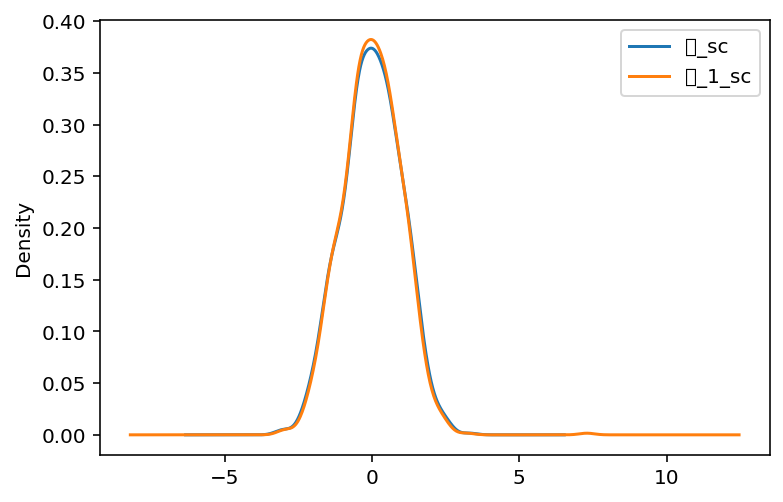

In [40]:
df[['키_sc','키_1_sc']].plot.kde()
## 표준 스케일링은 이상치가 있더라도 데이터의 분포변화는 거의 없다

In [41]:
df['키_1_nx'] = minmax.fit_transform(df[['키_1']])
df.head()

,키,몸무게,키_sc,몸무게_sc,키_nx,몸무게_nx,키_1,키_1_sc,키_1_nx
0,169.88,62.35,-0.083614,-0.516196,0.471787,0.449833,200.00,7.294051,1.000000
1,174.20,66.00,1.004643,0.248974,0.641066,0.571906,174.20,0.970146,0.388046
2,169.72,61.90,-0.123920,-0.610532,0.465517,0.434783,169.72,-0.127959,0.281784
3,165.32,74.55,-1.232331,2.041358,0.293103,0.857860,165.32,-1.206454,0.177419
4,170.44,63.80,0.057456,-0.212225,0.493730,0.498328,170.44,0.048522,0.298861


<AxesSubplot:ylabel='Density'>

C:\Users\i\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\i\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0, flags=flags)


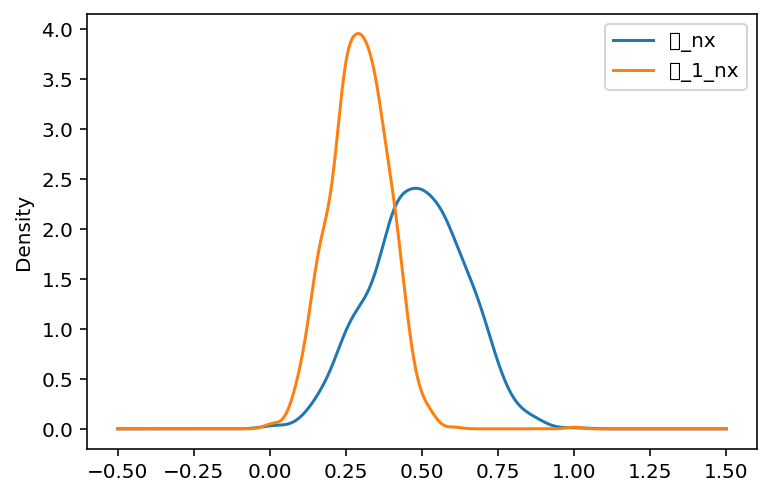

In [42]:
df[['키_nx','키_1_nx']].plot.kde()

## 이상치 하나 때문에 데이터의 다른값들이 크게 달라지게 됨
## 정상치 데이터와와 이상치 포함 데이터 분포 결과가 달라진다는건 입력되는 데이터가 달라지게 됨
## minmax 스케일링은 범위가 명확하다라는 전제가 있어야 한다

## 이상치 처리

In [ ]:
- 경험이 많이 필요한 전처리 
- 이상치 처리 목적
    - 이상치를 제거해서 데이터 분석의 정확도를 높이려는 경우
    - 이상치를 찾는것이 목적
        - 기기 이상을 찾는 경우
        - 신용카드 사용시 특이한 구매를 찾는 경우특이한 구매를 찾는 경우

### 이상치 탐지
- boxplot()을 보면 이상치 존재 파악이 쉽다
- 표준스케일링 한 후 값이 큰것 들(6 이상)을 이상치로 봄

<AxesSubplot:>

C:\Users\i\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\i\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0, flags=flags)


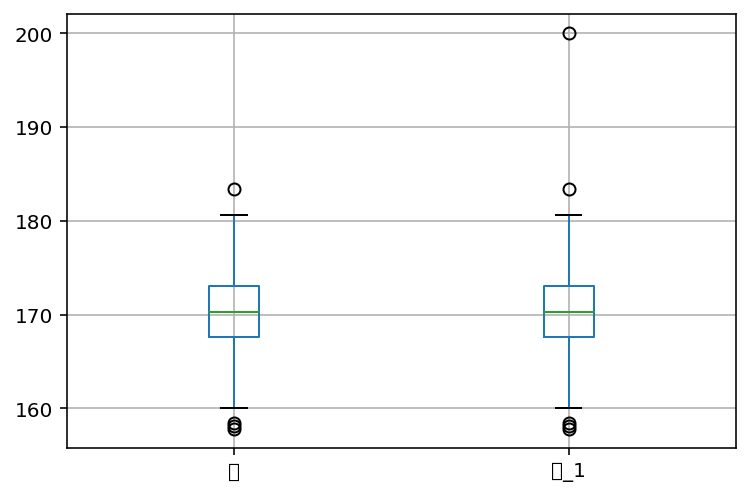

In [45]:
## 이상치가 없는 경우와 있는 경우의 박스 플롯
df[['키','키_1']].boxplot()

<AxesSubplot:>

C:\Users\i\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\i\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0, flags=flags)


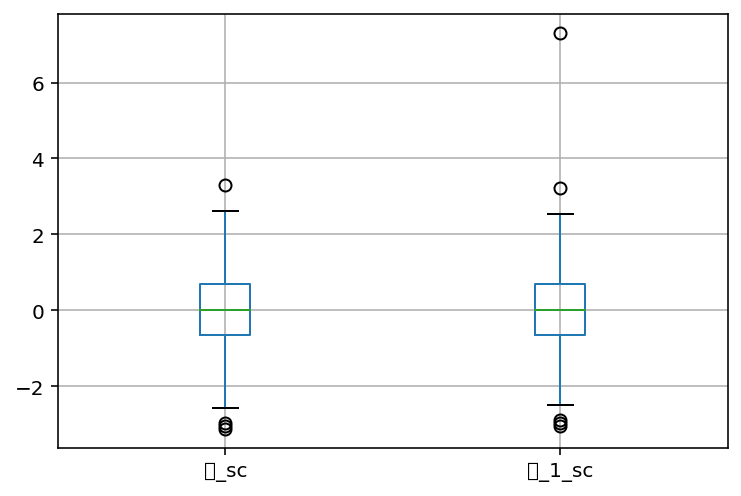

In [46]:
# 스케이링 된 데이터를 비교
df[['키_sc','키_1_sc']].boxplot()

## 데이터 변환

### 로그변환

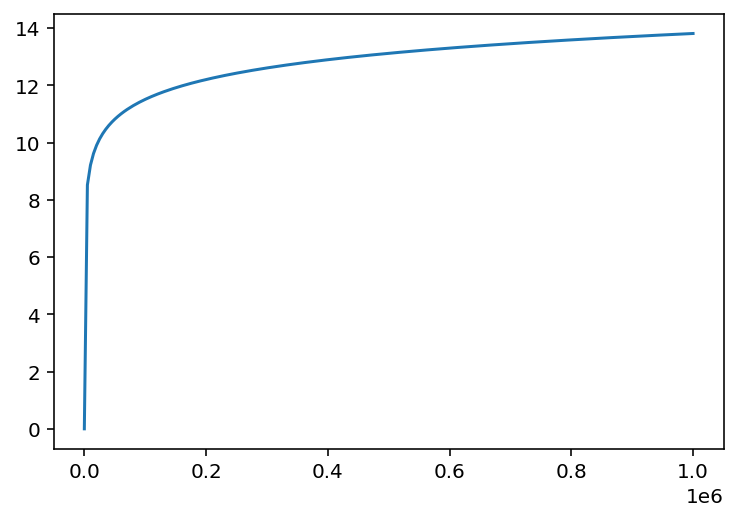

In [53]:
x = np.linspace(1,1000000,200)
y = np.log(x)
plt.plot(x,y)

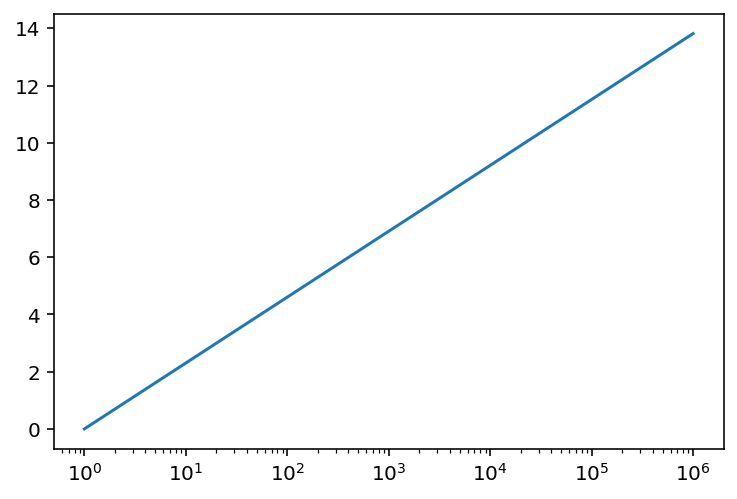

In [54]:
# x축을 log 스케일로 그리면(로그를 취하면)
plt.xscale('log')
plt.plot(x,y)

## log_normal 분포
    - 어떤값에 로그를 취하면 정규분포를 갖는 특성의 데이터

## 카테고리 인코딩
    - 연속형 숫자 데이터를 카테고리형(범주형)으로 바꾸는 것
    - 실력이 늘어나면 용돈을 더 준다

In [57]:
## 키 데이터를 이용해서 등급을 나누기
## 표준편차를 기준으로
## small < 평균을 기준으로 + - 표준편차 중심구간-standard 로 처리 < large
## 평균 : 170 표준편차 4 1=> 166이상~174미만  standard 처리
## tall 변수
# df.loc[df['키']>=174,'tall']='large'
df.loc[(df['키']<174)&(df['키']>=166),'tall']='standard'
df.loc[df['키']<166,'tall']='small'

In [58]:
df.head()

,키,몸무게,키_sc,몸무게_sc,키_nx,몸무게_nx,키_1,키_1_sc,키_1_nx,tall
0,169.88,62.35,-0.083614,-0.516196,0.471787,0.449833,200.00,7.294051,1.000000,standard
1,174.20,66.00,1.004643,0.248974,0.641066,0.571906,174.20,0.970146,0.388046,large
2,169.72,61.90,-0.123920,-0.610532,0.465517,0.434783,169.72,-0.127959,0.281784,standard
3,165.32,74.55,-1.232331,2.041358,0.293103,0.857860,165.32,-1.206454,0.177419,small
4,170.44,63.80,0.057456,-0.212225,0.493730,0.498328,170.44,0.048522,0.298861,standard


In [59]:
## tall 변수 구성비 확인
df['tall'].value_counts()

standard    664
large       182
small       154
Name: tall, dtype: int64

In [60]:
## tall 변수 구성비율 확인
df['tall'].value_counts()*100/len(df)

standard    66.4
large       18.2
small       15.4
Name: tall, dtype: float64

## 원 핫 인코딩
- 카테고리 변수의 일반적인 표현 방법
    - 데이터분석에서는 모든 데이터는 숫자로 바꿔서 표현해야 함
- pd.get_dummies() 사용

In [61]:
## tall 변수의 원핫인코딩
## 오리지널 값이 아니고 더미변수 만들어서 자기가 갖고 있는 값에만 1이 되게 정리
df_tall =pd.get_dummies(df['tall'])
df_tall.head()


,large,small,standard
0,0,0,1
1,1,0,0
2,0,0,1
3,0,1,0
4,0,0,1


In [63]:
## 데이터 프레임에 합치기(가로방향)
df_all = pd.concat((df,df_tall),axis=1)
df_all.head()

,키,몸무게,키_sc,몸무게_sc,키_nx,몸무게_nx,키_1,키_1_sc,키_1_nx,tall,large,small,standard
0,169.88,62.35,-0.083614,-0.516196,0.471787,0.449833,200.00,7.294051,1.000000,standard,0,0,1
1,174.20,66.00,1.004643,0.248974,0.641066,0.571906,174.20,0.970146,0.388046,large,1,0,0
2,169.72,61.90,-0.123920,-0.610532,0.465517,0.434783,169.72,-0.127959,0.281784,standard,0,0,1
3,165.32,74.55,-1.232331,2.041358,0.293103,0.857860,165.32,-1.206454,0.177419,small,0,1,0
4,170.44,63.80,0.057456,-0.212225,0.493730,0.498328,170.44,0.048522,0.298861,standard,0,0,1


### 최종 사용 데이터 
- 여러가지 전처리된 데이터 중에서 필요한 부분만 선택하여 최종 데이터 분석에 사용
- 일부 컬럼 선택

In [64]:
# 모든 컬럼명 보기
df_all.columns

Index(['키', '몸무게', '키_sc', '몸무게_sc', '키_nx', '몸무게_nx', '키_1', '키_1_sc',
       '키_1_nx', 'tall', 'large', 'small', 'standard'],
      dtype='object')

In [66]:
X=df_all[['키_sc','몸무게_sc','large','small','standard']]

In [67]:
X.head()

,키_sc,몸무게_sc,large,small,standard
0,-0.083614,-0.516196,0,0,1
1,1.004643,0.248974,1,0,0
2,-0.123920,-0.610532,0,0,1
3,-1.232331,2.041358,0,1,0
4,0.057456,-0.212225,0,0,1
